# Project: Wrangling and Analyze Data

In [89]:
# load required packages
import pandas as pd
import numpy as np
import requests
import json
import tweepy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tweepy import OAuthHandler
from timeit import default_timer as timer

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)


In [2]:
# loading the WeRateDogs Twitter archive data directly using pandas
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# download tweet image predictions using requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode='wb') as outfile:
    outfile.write(response.content)

image_predictions_df = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
twitter_archive_df.tweet_id.count()

2356

In [5]:
image_predictions_df.tweet_id.count()

2075

From the preceeding code outputs, the number of tweet ids from the two datasets are not the same hence the need to find the union of the two using `numpy`. The unioned tweet ids will then be used to gather the additional data using twitter API.

In [6]:
full_tweet_ids = np.union1d(image_predictions_df.tweet_id.unique(), 
                            twitter_archive_df.tweet_id.unique())
len(full_tweet_ids)

2356

In [7]:
# loading api tweets into pandas dataframe
api_tweets = []

with open('tweet_json.txt', encoding='utf-8') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id_str']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        api_tweets.append({
            'tweet_id': tweet_id,
            'retweet_count': retweet_count,
            'favorite_count': favorite_count
        })

main_api_tweets_df = pd.DataFrame(api_tweets)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual Assessment

In [8]:
#Display twitter archive table
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


+ A lot of missing values in the dataset i.e. **name**, **doggo**, **floofer**, **pupper** and **puppo** columns.  


+ None used to represent NULL values


+ Mistakes in dog ratings apparently due to wrong interpretation of figurative expressions such as 24/7, 9/11, etc. as valid dog ratings.  


+ Inaccurate arbitrary dog names such as **a**, **an**, **by**, **his**, etc recorded in lowercase.  


+ Hyperlinks or URLs ending every text and also in some cases html entity `&amp;` used instead of &.  


+ Some columns are redundant e.g. the retweets, replies and expanded.  

In [9]:
# Displaying image predictions table
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


+ Values for p1, p2, p3 are not case-consistent i.e. mixed uppercase and lowercase values.

In [10]:
# Displaying the tweets-json.txt twitter api data
main_api_tweets_df

,favorite_count,retweet_count,tweet_id
0,2293,423,666020888022790149
1,112,39,666029285002620928
2,100,36,666033412701032449
3,247,115,666044226329800704
4,89,37,666049248165822465
5,115,50,666050758794694657
6,1027,704,666051853826850816
7,367,196,666055525042405380
8,247,112,666057090499244032
9,99,47,666058600524156928


### Programmatic Assessment

In [11]:
twitter_archive_df.shape

(2356, 17)

In [12]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
twitter_archive_df[twitter_archive_df.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [15]:
twitter_archive_df.tweet_id.duplicated().sum()

0

In [16]:
twitter_archive_df.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Penny         10
Tucker        10
Lola          10
Winston        9
Bo             9
the            8
Sadie          8
Toby           7
Bailey         7
Daisy          7
Buddy          7
an             7
Stanley        6
Rusty          6
Milo           6
Bella          6
Scout          6
Dave           6
Jack           6
Oscar          6
Jax            6
Leo            6
Koda           6
George         5
            ... 
Ralf           1
Mimosa         1
Bowie          1
Luther         1
Florence       1
Kollin         1
Hero           1
my             1
Godi           1
Enchilada      1
Cannon         1
Alfy           1
Bert           1
Vince          1
Shawwn         1
Donny          1
Hall           1
Striker        1
Derby          1
Shikha         1
Yoda           1
Gabby          1
Lupe           1
Duddles        1
Jackie         1
Jockson        1
Marvin         1
Rudy          

In [17]:
twitter_archive_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [18]:
twitter_archive_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [19]:
twitter_archive_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [20]:
twitter_archive_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [21]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [23]:
image_predictions_df[image_predictions_df.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [24]:
image_predictions_df.p1.value_counts().sample(10)

schipperke          10
cliff                1
Walker_hound         5
English_springer    10
tricycle             1
common_iguana        3
fountain             1
patio                4
school_bus           1
slug                 1
Name: p1, dtype: int64

In [25]:
image_predictions_df.p2.value_counts().sample(10)

shovel                        1
Windsor_tie                   1
tailed_frog                   2
jigsaw_puzzle                 1
Staffordshire_bullterrier    18
gorilla                       2
Indian_elephant               3
German_shepherd              14
borzoi                       11
seat_belt                    12
Name: p2, dtype: int64

In [26]:
image_predictions_df.p3.value_counts().sample(10)

electric_fan               1
Norfolk_terrier           12
grey_fox                   1
sliding_door               2
Lhasa                      6
ram                        2
bow                        1
Welsh_springer_spaniel    10
Leonberg                   5
sunglass                   1
Name: p3, dtype: int64

In [27]:
main_api_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
favorite_count    2327 non-null int64
retweet_count     2327 non-null int64
tweet_id          2327 non-null object
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


In [28]:
main_api_tweets_df.describe()

,favorite_count,retweet_count
count,2327.000000,2327.000000
mean,7054.825956,2471.241083
std,10963.363856,4185.227191
min,0.000000,1.000000
25%,1225.500000,494.500000
50%,3050.000000,1149.000000
75%,8606.000000,2860.500000
max,144897.000000,70742.000000


In [29]:
main_api_tweets_df.shape

(2327, 3)

### Quality issues  
**`twitter_archive table`**  
1. Wrong data type for timestamp and tweet_id.  


2. text column contains links which can be extracted into a new column. 


3. Source values recorded as hyperlinks instead of actual source like iPhone, Vine, Twitter, etc.


4. Mistakes in dog ratings apparently due to wrong interpretation of figurative expressions such as 24/7, 9/11, etc. as valid dog ratings.  


5. Inaccurate and arbitrary dog names such as a*, *an, by, his, etc.  


6. text column contains html entity `&amp;` used instead of & and also `\n` for new line.  


**`image_predictioins table`**  

7. tweet_id data type should be object(string) instead of int64.  


8. Values for p1, p2, p3 are not case-consistent i.e. mixed uppercase and lowercase values. 



### Tidiness issues
  
1. ***doggo***, ***floofer***, ***pupper***, and ***puppo*** columns should be grouped into one ***dog_stage*** column. 


2. Drop redundant columns in **`twitter_archived`**, drop all null values and merge the 3 tables.  


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [30]:
# Make copies of original pieces of data
archive_tweets_clean = twitter_archive_df.copy()
api_tweets_clean = main_api_tweets_df.copy()
image_pred_clean = image_predictions_df.copy()

### Issue #1:

#### Define:
+ Change ***timestamp*** and ***tweet_id*** data types to `datetime` and `string` using pandas' to_datetime and astype methods respectively.
+ Rename ***timestamp*** to ***date_created***. 

#### Code

In [31]:
# change timestamp and tweet_id columns data type
archive_tweets_clean['timestamp'] = pd.to_datetime(archive_tweets_clean['timestamp'])
archive_tweets_clean['tweet_id'] = archive_tweets_clean['tweet_id'].astype('str')

# rename timestamp to date_created 
archive_tweets_clean.rename(columns={'timestamp': 'date_created'}, inplace=True)

#### Test

In [32]:
archive_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
date_created                  2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

### Issue #2:

**Define**  

+ Extract links or URLs from text into a new column named tweet_url using regular expression.


**Code**  

In [33]:
# extract links from text
archive_tweets_clean['tweet_url'] = archive_tweets_clean.text.str.extract(r"(https://t.co/[a-zA-Z0-9-]+)", expand=True)

**Test**

In [34]:
archive_tweets_clean['tweet_url'].head(10)

0    https://t.co/MgUWQ76dJU
1    https://t.co/0Xxu71qeIV
2    https://t.co/wUnZnhtVJB
3    https://t.co/tD36da7qLQ
4    https://t.co/AtUZn91f7f
5    https://t.co/kQ04fDDRmh
6    https://t.co/Zr4hWfAs1H
7    https://t.co/v0nONBcwxq
8    https://t.co/9TwLuAGH0b
9    https://t.co/t1bfwz5S2A
Name: tweet_url, dtype: object

### Issue #3:

#### Define

+ Replace URLs with the appropriate medium i.e. iPhone, Twitter, Vine and TweetDeck etc. using pandas' replace method. 

#### Code

In [35]:
# use replace all urls with the right words
archive_tweets_clean.source.replace({
    '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 'iPhone',
    '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>': 'Vine',
    '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Twitter Web Client',
    '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'TweetDeck'
}, inplace=True)

#### Test

In [36]:
archive_tweets_clean.source.value_counts()

iPhone                2221
Vine                    91
Twitter Web Client      33
TweetDeck               11
Name: source, dtype: int64

### Issue #4:

#### Define

+ Map all erroneous ratings with text from which they were extracted. Using several regular expression methods such as contains, extractall, etc. to sanitize the ratings. 

#### Code

In [37]:
# checking for ratings with decimals wrongfully extracted from text
archive_tweets_clean[archive_tweets_clean.text.str.contains(r'(\d+\.\d*\/\d+)')][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
340,"RT @dog_rates: This is Logan, the Chow who liv...",75
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1689,I've been told there's a slight possibility he...,5
1712,Here we have uncovered an entire battalion of ...,26


In [38]:
# checking text with double ratings
wrong_ratings = archive_tweets_clean.text.str.extractall(r"(\d+\d*\/\d+)")

# grab only double ratings i.e. match = 1
matches_found = wrong_ratings.query('match == 1')


# display double ratings 
wrong_ratings_df = archive_tweets_clean.iloc[matches_found.index.labels[0], [5,10,11]]
wrong_ratings_df

,text,rating_numerator,rating_denominator
55,@roushfenway These are good dogs but 17/10 is ...,17,10
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0
561,"RT @dog_rates: ""Yep... just as I suspected. Yo...",12,10
766,"""Yep... just as I suspected. You're not flossi...",12,10
784,"RT @dog_rates: After so many requests, this is...",9,11
860,RT @dog_rates: Meet Eve. She's a raging alcoho...,8,10
1007,This is Bookstore and Seaweed. Bookstore is ti...,10,10
1068,"After so many requests, this is Bretagne. She ...",9,11
1165,Happy 4/20 from the squad! 13/10 for all https...,4,20
1202,This is Bluebert. He just saw that both #Final...,50,50


In [39]:
# fixing ratings with decimal points
archive_tweets_clean.iloc[45, 10] = 13.5
archive_tweets_clean.iloc[340, 10] = 9.75
archive_tweets_clean.iloc[695, 10] = 9.75
archive_tweets_clean.iloc[763, 10] = 11.27
archive_tweets_clean.iloc[1689, 10] = 9.5
archive_tweets_clean.iloc[1712, 10] = 11.26

In [40]:
# fixing other rating errors. These include 9/11 (Sept 11th), 4/20 (Weed Day), 1/2 (half legged Episcopalian)
archive_tweets_clean.iloc[55, 10]  = 13
archive_tweets_clean.iloc[313, 10] = 13
archive_tweets_clean.iloc[313, 11] = 10
archive_tweets_clean.iloc[561, 10] = 11
archive_tweets_clean.iloc[766, 10] = 11
archive_tweets_clean.iloc[784, 10] = 14
archive_tweets_clean.iloc[784, 11] = 10
archive_tweets_clean.iloc[1068, 10] = 14
archive_tweets_clean.iloc[1068, 11] = 10
archive_tweets_clean.iloc[1165, 10] = 13
archive_tweets_clean.iloc[1165, 11] = 10
archive_tweets_clean.iloc[1202, 10] = 11
archive_tweets_clean.iloc[1202, 11] = 10
archive_tweets_clean.iloc[1459, 10] = 13
archive_tweets_clean.iloc[1459, 11] = 10
archive_tweets_clean.iloc[1508, 10] = 10
archive_tweets_clean.iloc[1662, 10] = 10
archive_tweets_clean.iloc[2335, 10] = 9
archive_tweets_clean.iloc[2335, 11] = 10

#### Test

In [41]:
archive_tweets_clean[archive_tweets_clean.text.str.contains(r'(\d+\.\d*\/\d+)')][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,13.50
340,"RT @dog_rates: This is Logan, the Chow who liv...",9.75
695,"This is Logan, the Chow who lived. He solemnly...",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27
1689,I've been told there's a slight possibility he...,9.50
1712,Here we have uncovered an entire battalion of ...,11.26


In [42]:
archive_tweets_clean.iloc[matches_found.index.labels[0], [5,10,11]]

,text,rating_numerator,rating_denominator
55,@roushfenway These are good dogs but 17/10 is ...,13.0,10
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,13.0,10
561,"RT @dog_rates: ""Yep... just as I suspected. Yo...",11.0,10
766,"""Yep... just as I suspected. You're not flossi...",11.0,10
784,"RT @dog_rates: After so many requests, this is...",14.0,10
860,RT @dog_rates: Meet Eve. She's a raging alcoho...,8.0,10
1007,This is Bookstore and Seaweed. Bookstore is ti...,10.0,10
1068,"After so many requests, this is Bretagne. She ...",14.0,10
1165,Happy 4/20 from the squad! 13/10 for all https...,13.0,10
1202,This is Bluebert. He just saw that both #Final...,11.0,10


### Issue #5:

#### Define

+ Replace all arbitrary names such as **a**, **an**, **by**, **his**, etc. with numpy.nan using the replace method.  

#### Code

In [43]:
# Note that all these arbitrary names are all lowercase whilst the proper names are capitalized.
# So using the apply method we would filter out all values not capitalized and replace with NAN
archive_tweets_clean['name'] = archive_tweets_clean['name'].apply(lambda x: np.nan if not x[0].isupper() or x == 'None' else x)

#### Test

In [44]:

archive_tweets_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey', 'Harry',
       'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer', 'Cody',
       'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold',
       'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Quinn', 'Belle', 'Zooey',

### Issue #6:

#### Define

+ Replace all **URLs**, **\n**, with empty string and `&amp;` with & using pandas replace method.

#### Code

In [45]:
# replace urls, \n with empty string and &amp; with &
archive_tweets_clean['text'] = archive_tweets_clean.text.str.replace('\n', '')
archive_tweets_clean['text'] = archive_tweets_clean.text.str.replace('&amp;', '&')
archive_tweets_clean['text'] = archive_tweets_clean.text.str.replace(r'http\S+', '')

In [46]:
archive_tweets_clean[['text']].sample(10)

,text
312,Meet Lola. Her hobbies include being precious ...
1760,Here we are witnessing a wild field pupper. Lo...
322,This is Sunshine. She doesn't believe in perso...
833,RT @dog_rates: This is Nollie. She's waving at...
225,This is Kevin. Kevin doesn't give a single h*c...
2049,This is Charlie. He was just informed that dog...
1797,This is the happiest pupper I've ever seen. 10...
1018,Guys... Dog Jesus 2.013/10 buoyant af
1335,This is Jimothy. He lost his body during the t...
2295,This is Gabe. He is a southern Baklava. Gabe h...


### Issue #7:

#### Define

+ Change the tweet_id column of `image_pred_clean table`data type from int64 to string.

#### Code

In [47]:
# change tweet_id data type to string
image_pred_clean['tweet_id'] = image_pred_clean['tweet_id'].astype('str')


#### Test

In [48]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #8:

#### Define

+ Capitalize dog breeds in p1, p2 and p3 columns of the `image_pred_clean table`

#### Code

In [49]:
# Capitalize all dog breeds to make it consistent
image_pred_clean['p1'] = image_pred_clean['p1'].str.title()
image_pred_clean['p2'] = image_pred_clean['p2'].str.title()
image_pred_clean['p3'] = image_pred_clean['p3'].str.title()

#### Test

In [50]:
image_pred_clean['p1'].sample(5)

1387          Toy_Poodle
1381    Golden_Retriever
1013    Golden_Retriever
1111               Boxer
1947              Basset
Name: p1, dtype: object

In [51]:
image_pred_clean['p2'].sample(5)

531                 Kuvasz
2033    Labrador_Retriever
2024          Afghan_Hound
400       Sealyham_Terrier
1459        Cocker_Spaniel
Name: p2, dtype: object

In [52]:
image_pred_clean['p3'].sample(5)

1190    Miniature_Poodle
2074              Banana
1296           Chihuahua
989                Teddy
1688         Paper_Towel
Name: p3, dtype: object

### Tidiness

### Issue #9:

#### Define

+ Replace all none values with empty string in doggo, floofer, pupper, puppo columns.
+ Concatenate doggo, floofer, pupper and puppo into a single dog.
+ Drop doggo, floofer, pupper and puppo columns.

#### Code 

In [53]:
# replace None with empty string
archive_tweets_clean['doggo'] = archive_tweets_clean['doggo'].replace('None', '')
archive_tweets_clean['floofer'] = archive_tweets_clean['floofer'].replace('None', '')
archive_tweets_clean['pupper'] = archive_tweets_clean['pupper'].replace('None', '')
archive_tweets_clean['puppo'] = archive_tweets_clean['puppo'].replace('None', '')

In [54]:
# Merge all 3 columns into a single dog stage column
doggo = archive_tweets_clean['doggo'] 
floofer = archive_tweets_clean['floofer']
pupper = archive_tweets_clean['pupper']
puppo = archive_tweets_clean['puppo']
archive_tweets_clean['dog_stage'] = doggo + floofer + pupper + puppo
archive_tweets_clean['dog_stage'] = archive_tweets_clean['dog_stage'].replace('doggopupper', 'doggo pupper')
archive_tweets_clean['dog_stage'] = archive_tweets_clean['dog_stage'].replace('doggopuppo', 'doggo puppo')
archive_tweets_clean['dog_stage'] = archive_tweets_clean['dog_stage'].replace('doggofloofer', 'doggo floofer')

In [55]:
archive_tweets_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [56]:
archive_tweets_clean['dog_stage'].value_counts()

                 1976
pupper            245
doggo              83
puppo              29
doggo pupper       12
floofer             9
doggo puppo         1
doggo floofer       1
Name: dog_stage, dtype: int64

In [57]:
archive_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
date_created                  2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null int64
name                          1502 non-null object
tweet_url                     2227 non-null object
dog_stage                     2356 non-null object
dtypes: datetime64[ns](1), float64(5), int64(1), object(8)
memory usage: 276.2+ KB


### Issue #10:

#### Define

+ Drop all redundant columns i.e. `in_reply_to_status_id`, `in_reply_to_user_id`, `retweet_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`.

#### Code

In [58]:
# Drop redundant columns
columns_to_drop = ['in_reply_to_status_id', 'in_reply_to_user_id', 
                   'retweeted_status_id', 'retweeted_status_user_id', 
                   'retweeted_status_timestamp']
archive_tweets_clean.drop(columns_to_drop, axis=1, inplace=True)

#### Test

In [59]:
archive_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2356 non-null object
date_created          2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null int64
name                  1502 non-null object
tweet_url             2227 non-null object
dog_stage             2356 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 184.1+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [60]:
master = pd.merge(archive_tweets_clean, image_pred_clean, on='tweet_id')
master = pd.merge(master, api_tweets_clean, on='tweet_id')
df = master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [61]:
df = pd.read_csv('twitter_archive_master.csv')

In [62]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,2.057000e+03,2057.000000,2057.000000,2057.000000,2057.000000,2.057000e+03,2.057000e+03,2057.000000,2057.000000
mean,7.377684e+17,12.222547,10.494895,1.204181,0.594274,1.348003e-01,6.042487e-02,7444.587263,2363.648517
std,6.756840e+16,40.821254,7.149943,0.563240,0.271223,1.007304e-01,5.100092e-02,11265.899785,4132.906233
min,6.660209e+17,0.000000,7.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,11.000000
25%,6.762374e+17,10.000000,10.000000,1.000000,0.363272,5.390140e-02,1.624560e-02,1408.000000,502.000000
50%,7.110080e+17,11.000000,10.000000,1.000000,0.587764,1.186470e-01,4.948690e-02,3253.000000,1114.000000
75%,7.928838e+17,12.000000,10.000000,1.000000,0.843911,1.959500e-01,9.219820e-02,9278.000000,2718.000000
max,8.924206e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,144897.000000,70742.000000


### Insights:

1. Most images have a prediction confidence of 100% (i.e p1_conf). 

2. Golden Retriever breed of dog was more prevalent in the tweets.  

3. Source of most tweets was iPhone. 

### Visualization

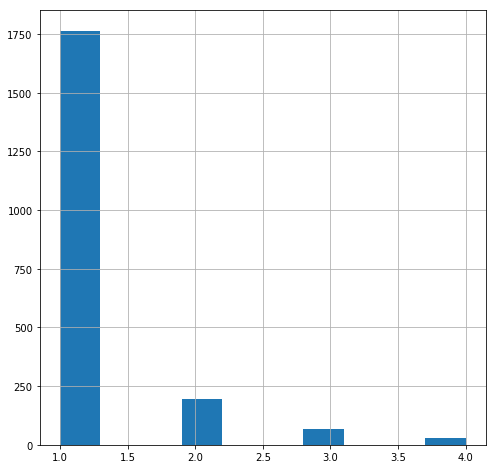

In [94]:
df['img_num'].hist(figsize=(8,8));
fig = plt.gcf() 
fig.savefig('conf.png',bbox_inches='tight');

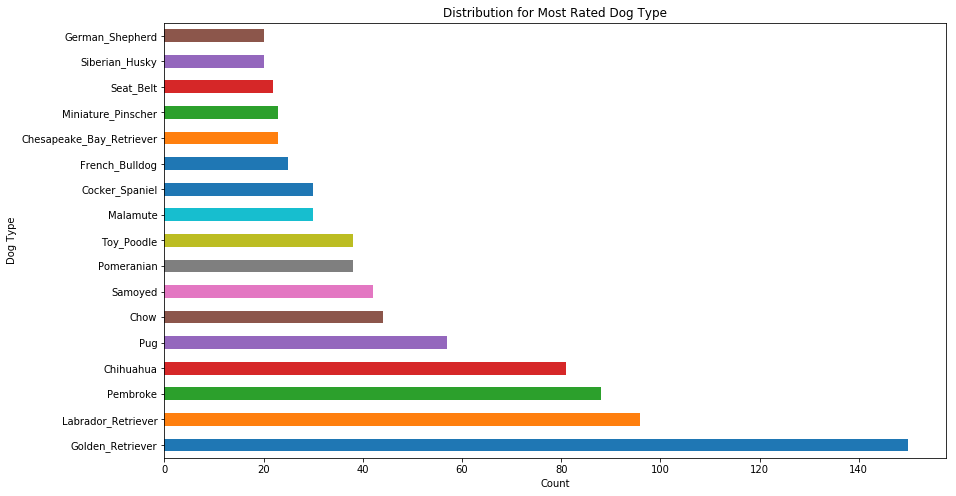

In [91]:
df_breed = df.groupby('p1').filter(lambda x: len(x) >= 20)

plt.figure(figsize=[14,8])
df_breed['p1'].value_counts().plot(kind = 'barh')
plt.title('Distribution for Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Dog Type')
fig = plt.gcf() 
fig.savefig('dog_type.png',bbox_inches='tight');

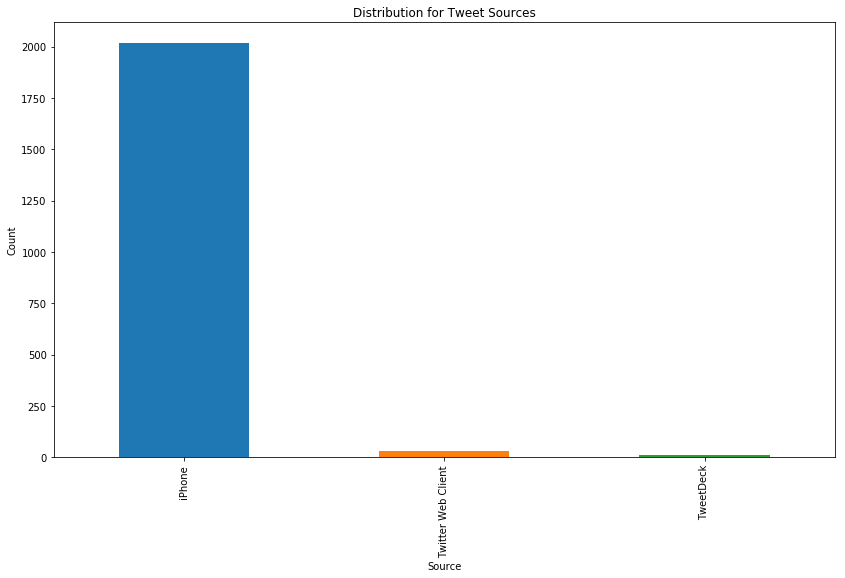

In [95]:
plt.figure(figsize=[14,8])
df.source.value_counts().plot(kind = 'bar')
plt.title('Distribution for Tweet Sources')
plt.xlabel('Source')
plt.ylabel('Count')
fig = plt.gcf() 
fig.savefig('twt_source.png',bbox_inches='tight');

### Sources
+ [stackoverflow](https://stackoverflow.com)
+ [kaggle](https://www.kaggle.com/)
+ [geekforgeeks](https://www.geeksforgeeks.org/)
+ [pandas.pydata.org](https://pandas.pydata.org)